[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Computational_Statistics/blob/main/1/W1P3.ipynb)


In [ ]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt

# ***Let's do some OOP***
We create a coin class below. Out of this class we create coing instances with given $p$ values we want.

In [ ]:
class coin:
  def __init__(self, p = 1/2):
    self.p = p
  def flip(self):
    return np.random.choice(["heads", "tails"], p = [self.p, 1-self.p])
  def flip_n_times(self, n: int, return_results: bool = True):
    result = np.random.binomial(1, p = self.p, size = n)
    if return_results:
      return result
    sum_ = sum(result)
    return sum_, n-sum_

In [ ]:
co = coin(1/2)  #### this dude is an unbiased coin.

In [ ]:
co.p #### you see an attribute of the object.

0.5

In [ ]:
co.flip_n_times(20, return_results = False)

(8, 12)

In [ ]:
times = 150
T = [co.flip_n_times(times, return_results = False)[0] for _ in range(100000)]


Expected value of Bernoulli Distribution $E(X) = np$, and $\sigma^2 = np(1-p)$

In [ ]:
print(f"Standard deviation of sample {np.std(T, ddof = 1)}. Mean of sample {np.mean(T)}")
print(f"The standard deviation of the population is {np.sqrt(times*(co.p*(1-co.p)))}, and the mean is {times*(co.p)}")

Standard deviation of sample 6.121816256336249. Mean of sample 74.9993
The standard deviation of the population is 6.123724356957945, and the mean is 75.0


Witness the power of science!

(array([1.25000e-05, 2.50000e-05, 5.00000e-05, 6.25000e-05, 0.00000e+00,
        1.62500e-04, 2.37500e-04, 3.62500e-04, 8.12500e-04, 0.00000e+00,
        1.07500e-03, 1.86250e-03, 2.85000e-03, 3.93750e-03, 0.00000e+00,
        6.12500e-03, 8.26250e-03, 1.13875e-02, 1.68625e-02, 0.00000e+00,
        2.12625e-02, 2.71750e-02, 3.42000e-02, 4.39125e-02, 0.00000e+00,
        4.92875e-02, 5.87375e-02, 6.67125e-02, 7.10000e-02, 0.00000e+00,
        7.68875e-02, 7.99875e-02, 8.26125e-02, 7.97625e-02, 0.00000e+00,
        7.65625e-02, 7.20500e-02, 6.67500e-02, 5.91000e-02, 0.00000e+00,
        4.96750e-02, 4.25750e-02, 3.48625e-02, 2.82125e-02, 0.00000e+00,
        2.15000e-02, 1.57375e-02, 1.16375e-02, 8.65000e-03, 0.00000e+00,
        6.18750e-03, 4.20000e-03, 2.78750e-03, 1.61250e-03, 0.00000e+00,
        1.11250e-03, 5.25000e-04, 1.87500e-04, 1.50000e-04, 0.00000e+00,
        1.12500e-04, 7.50000e-05, 7.50000e-05, 0.00000e+00, 3.75000e-05]),
 array([ 49. ,  49.8,  50.6,  51.4,  52.2,  53. ,

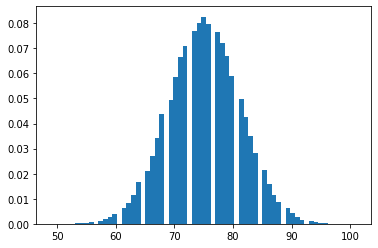

In [ ]:
plt.hist(T, density = True, bins = 65)

This is just because, if $\chi$ is Bernoulli random variable, then $P(\chi < a)$ can be found by normal distribution with mean and variance given above. Remember the meme about central limit theorem. $\chi$ is a sum of i.i.d random variables.
More scientifically, if $\chi = Bin(n, p)$, and $np(1-p) \gg 1$, then 
$$
\chi \sim N(np, np(1-p)).
$$

Let's now take an unfair coin say $p = 0.25$ and see if can see something bizzare!

In [ ]:
unfair_con = coin(p = 1/4)
unfair_con.flip_n_times(times, return_results = False)

(36, 114)

In [ ]:
times = 150
L = [unfair_con.flip_n_times(times, return_results = False)[0] for _ in range(100000)]

print(f"Standard deviation of sample {np.std(L)}. Mean of sample {np.mean(L)}")
print(f"The standard deviation of the population of the fair coin is {np.sqrt(times*(1/4))}, and the mean of the fair coin is {times*(1/2)}")


Standard deviation of sample 5.302739500211189. Mean of sample 37.51827
The standard deviation of the population of the fair coin is 6.123724356957945, and the mean of the fair coin is 75.0


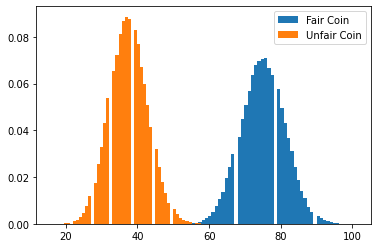

In [ ]:
plt.hist(T, density = True, bins = 60, label = "Fair Coin")
plt.hist(L, density = True, bins = 60, label = "Unfair Coin")
plt.legend()
plt.show()

Let's get back to the question: Assume that you are told you flip a fair coin 200 times. This coin lands 40 heads, and 160 times tails. Would you expect that it is really fair? How would you find this out?

Say $\chi\sim Bin(200, 1/2)$, then $\chi \sim N(200 \times 1/2, 200\times1/2 \times 1/2)$  by Central Limit Theorem.  Now

> Indented block



In [ ]:
z_obs = (40/200 - 1/2)/(np.sqrt(1/(4*200)))   ###or
print(z_obs)

-8.48528137423857


In [ ]:
z_obs = (40 - 100)/(np.sqrt(200/4))   ###or
print(z_obs)

-8.48528137423857


In [ ]:
from scipy.stats import norm

In [ ]:
normal = norm(0,1)
norm.ppf(0.16)  #### se what this function does!

-0.994457883209753

This guy stays really far away from the mean, therefore it is really likely that the coin is unfair.